In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
listings_data = pd.read_csv('listings_athens.csv')

reviews_data = pd.read_csv('reviews_athens.csv')

In [3]:
listings_data.shape

(9582, 74)

In [4]:
listings_data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,2.021100e+13,26-10-2021,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,2.021100e+13,25-10-2021,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.82,4.82,1070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,2.021100e+13,25-10-2021,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.83,4.83,957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,2.021100e+13,25-10-2021,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,2.021100e+13,26-10-2021,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,957579,t,6,6,0,0,0.23


In [6]:
reviews_data.shape

(406607, 6)

In [7]:
reviews_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535.0,20-05-2011,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609.0,20-05-2013,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994.0,04-05-2014,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located to v...


In [8]:
# merging listing and reviews data

dataframe= pd.merge(reviews_data, listings_data[['neighbourhood_cleansed', 'host_id', 'latitude','longitude', 'number_of_reviews', 'id', 'property_type','review_scores_communication','review_scores_location','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_rating','review_scores_accuracy']], 
              left_on='listing_id', right_on='id', how='left')

dataframe.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood_group'}, inplace=True)
dataframe.drop(['id_y'], axis=1, inplace=True)

In [9]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,10595,271535.0,20-05-2011,189305,Pamela,"The apartment was wonderful, fully equiped, be...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil was an excellent host. He provided u...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
2,10595,4678609.0,20-05-2013,2635427,Ahmet,"Manos is a very good host, he is kind and help...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
3,10595,12502994.0,04-05-2014,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located to v...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81


In [10]:
dataframe.shape

(406607, 19)

In [11]:
#count missing values
dataframe['comments'].isnull().sum()

407

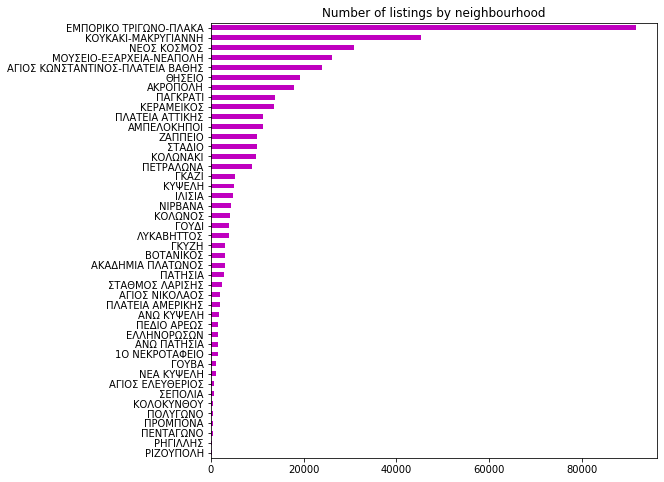

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe['neighbourhood_group'].value_counts().sort_values(ascending=True).plot.barh(x='neighbourhood_group',
                      y='count',
                      ax=ax,
                      color="m")

ax.set_title("Number of listings by neighbourhood")

plt.show()

In [13]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(dataframe.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
29927830,152
20104194,70
1621474,68
112527018,65
748818,59
2089542,48
47038350,46
135482892,42
90390850,39


In [15]:
top1_host = dataframe.host_id == 29927830
dataframe[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,5
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,2
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,7
ΑΚΡΟΠΟΛΗ,4
ΑΜΠΕΛΟΚΗΠΟΙ,2
ΒΟΤΑΝΙΚΟΣ,1
ΕΛΛΗΝΟΡΩΣΩΝ,1
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,26
ΖΑΠΠΕΙΟ,3


In [16]:
pd.DataFrame(dataframe[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire rental unit,152


In [17]:
top2_host = dataframe.host_id == 20104194
dataframe[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
ΑΚΡΟΠΟΛΗ,3
ΑΜΠΕΛΟΚΗΠΟΙ,3
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,14
ΖΑΠΠΕΙΟ,4
ΙΛΙΣΙΑ,1
ΚΕΡΑΜΕΙΚΟΣ,1
ΚΟΛΩΝΑΚΙ,6
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,12
ΛΥΚΑΒΗΤΤΟΣ,2


In [18]:
pd.DataFrame(dataframe[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire loft,4
Entire rental unit,66


# Preprocessing

In [19]:
dataframe.isna().sum()

listing_id                       0
id                               0
date                             0
reviewer_id                      0
reviewer_name                    0
comments                       407
neighbourhood_group              0
host_id                          0
latitude                         0
longitude                        0
number_of_reviews                0
property_type                    0
review_scores_communication     38
review_scores_location          38
review_scores_value             39
review_scores_cleanliness       38
review_scores_checkin           38
review_scores_rating             0
review_scores_accuracy          38
dtype: int64

In [20]:
dataframe.dropna(inplace=True)
dataframe.isna().sum()

listing_id                     0
id                             0
date                           0
reviewer_id                    0
reviewer_name                  0
comments                       0
neighbourhood_group            0
host_id                        0
latitude                       0
longitude                      0
number_of_reviews              0
property_type                  0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_rating           0
review_scores_accuracy         0
dtype: int64

In [21]:
dataframe.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,10595,271535.0,20-05-2011,189305,Pamela,"The apartment was wonderful, fully equiped, be...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil was an excellent host. He provided u...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
2,10595,4678609.0,20-05-2013,2635427,Ahmet,"Manos is a very good host, he is kind and help...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
3,10595,12502994.0,04-05-2014,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu...",ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located to v...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81


In [22]:
D=dataframe.groupby('neighbourhood_group')["review_scores_rating"].describe().transpose()
D.head()

neighbourhood_group,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,...,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
count,1446.000000,691.000000,23861.000000,2044.000000,3034.000000,17851.000000,11149.000000,1667.000000,1566.000000,3055.000000,...,8834.000000,2026.000000,11336.000000,425.000000,401.000000,333.000000,181.000000,657.000000,9881.000000,2324.000000
mean,4.835595,4.853748,4.767221,4.723019,4.803800,4.861213,4.816414,4.759586,4.787854,4.822065,...,4.829386,4.724541,4.757304,4.845812,4.720723,4.685405,4.841768,4.851172,4.806967,4.782883
std,0.147288,0.171061,0.184030,0.255772,0.152229,0.152657,0.197323,0.214680,0.169281,0.136951,...,0.152655,0.218961,0.202694,0.117397,0.143299,0.062764,0.127881,0.165949,0.169408,0.198324
min,4.000000,2.500000,1.000000,3.000000,1.000000,1.000000,1.000000,3.330000,4.000000,4.000000,...,1.000000,1.000000,1.000000,4.500000,4.500000,4.660000,4.330000,4.000000,3.250000,3.170000
25%,4.790000,4.810000,4.690000,4.650000,4.720000,4.810000,4.770000,4.720000,4.700000,4.700000,...,4.770000,4.620000,4.680000,4.760000,4.660000,4.660000,4.830000,4.750000,4.740000,4.690000


In [23]:
df = dataframe.groupby(['neighbourhood_group']).mean()['review_scores_rating']

df.sort_values()

neighbourhood_group
ΡΗΓΙΛΛΗΣ                            4.685405
ΠΡΟΜΠΟΝΑ                            4.720723
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      4.723019
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                    4.724541
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                     4.757304
ΑΝΩ ΚΥΨΕΛΗ                          4.759586
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    4.767221
ΚΟΛΩΝΟΣ                             4.774831
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                     4.782883
ΝΙΡΒΑΝΑ                             4.785459
ΚΟΛΟΚΥΝΘΟΥ                          4.785646
ΑΝΩ ΠΑΤΗΣΙΑ                         4.787854
ΠΕΝΤΑΓΩΝΟ                           4.789501
ΓΟΥΒΑ                               4.789588
ΝΕΑ ΚΥΨΕΛΗ                          4.792771
ΠΕΔΙΟ ΑΡΕΩΣ                         4.792954
ΚΥΨΕΛΗ                              4.793306
ΙΛΙΣΙΑ                              4.796100
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   4.803800
ΠΑΤΗΣΙΑ                             4.806680
ΣΤΑΔΙΟ                              4.806967
ΚΟΛΩΝΑΚΙ                           

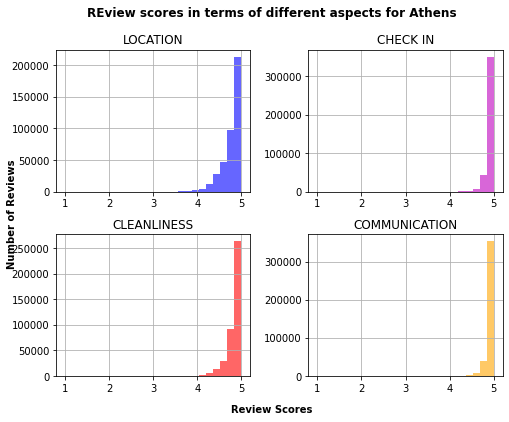

In [25]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(8,6))

# plot all 4 histograms
dataframe.hist('review_scores_location', bins=25, ax=axes[0,0], color='blue', alpha=0.6)
axes[0,0].set_title('LOCATION')

dataframe.hist('review_scores_checkin', bins=25, ax=axes[0,1], color='m', alpha=0.6)
axes[0,1].set_title('CHECK IN')

dataframe.hist('review_scores_cleanliness', bins=25, ax=axes[1,0], color='red', alpha=0.6)
axes[1,0].set_title('CLEANLINESS')

dataframe.hist('review_scores_communication', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('COMMUNICATION')




# plot common x- and y-label
fig.text(0.5, 0.04, 'Review Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('REview scores in terms of different aspects for Athens', fontsize=12, fontweight='bold');

# Word frequency

In [26]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

#fill missing values with NA
all_words_review = convert(dataframe['comments'].fillna(""))

In [27]:
# WORDS ARE SPLIT TO COUNT FREQUENCY

count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,810751
1,and,703190
2,a,428922
3,to,426450
4,is,324529


# Removing Punctuations, Numbers, and Special Characters

In [28]:
dataframe['comments'] = dataframe['comments'].str.replace("[^a-zA-Z#]", " ")

In [29]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,10595,271535.0,20-05-2011,189305,Pamela,The apartment was wonderful fully equiped be...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil was an excellent host He provided u...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
2,10595,4678609.0,20-05-2013,2635427,Ahmet,Manos is a very good host he is kind and help...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
3,10595,12502994.0,04-05-2014,2422327,Hema,Our stay in Emmanouil home was comfortable qu...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located to v...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81


# Removing short words

In [30]:
dataframe['comments'] = dataframe['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

dataframe.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,10595,271535.0,20-05-2011,189305,Pamela,apartment wonderful fully equiped beautiful de...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil excellent host provided with everyth...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
2,10595,4678609.0,20-05-2013,2635427,Ahmet,Manos very good host kind helpful apartments s...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
3,10595,12502994.0,04-05-2014,2422327,Hema,stay Emmanouil home comfortable quite just per...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located visi...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
5,10595,30613190.0,25-04-2015,28845283,Karen,Manos very gracious host made sure arrived fro...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
6,10595,32403740.0,17-05-2015,18119354,Luisa,Manos amazing host start very polite arrived l...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
7,10595,33072497.0,25-05-2015,27699139,Brigitte,Appartement correspondant bien description seu...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
8,10595,48058154.0,23-09-2015,19495001,Eileen,apartment exactly described very comfortable c...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81
9,10595,57859668.0,29-12-2015,52563564,Thanasis,Great apartment owner people stayed here There...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,32,Entire rental unit,4.84,4.5,4.66,4.75,4.84,4.77,4.81


# Tokenization

In [31]:
tokenized_dataframe = dataframe['comments'].apply(lambda x: x.split())
tokenized_dataframe.head(10)

0    [apartment, wonderful, fully, equiped, beautif...
1    [Emmanouil, excellent, host, provided, with, e...
2    [Manos, very, good, host, kind, helpful, apart...
3    [stay, Emmanouil, home, comfortable, quite, ju...
4    [Fantastic, accommodation, very, well, located...
5    [Manos, very, gracious, host, made, sure, arri...
6    [Manos, amazing, host, start, very, polite, ar...
7    [Appartement, correspondant, bien, description...
8    [apartment, exactly, described, very, comforta...
9    [Great, apartment, owner, people, stayed, here...
Name: comments, dtype: object

# Stemming

In [32]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

In [33]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_dataframe = tokenized_dataframe.apply(lambda x: [ps.stem(i) for i in x])

tokenized_dataframe.head()

0    [apart, wonder, fulli, equip, beauti, decor, v...
1    [emmanouil, excel, host, provid, with, everyth...
2    [mano, veri, good, host, kind, help, apart, sp...
3    [stay, emmanouil, home, comfort, quit, just, p...
4    [fantast, accommod, veri, well, locat, visit, ...
Name: comments, dtype: object

# Removing stopwords of no value


In [34]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [35]:
stop_words = set(stopwords.words(['english']))

# View a few words from the set
list(stop_words)[0:30]

['hers',
 'through',
 'been',
 'too',
 "isn't",
 'nor',
 'into',
 'ma',
 'did',
 'own',
 "didn't",
 "hadn't",
 "don't",
 'because',
 'what',
 'him',
 'each',
 'between',
 'it',
 "it's",
 "doesn't",
 'with',
 'was',
 'further',
 'than',
 'he',
 'don',
 "that'll",
 'now',
 'have']

In [36]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

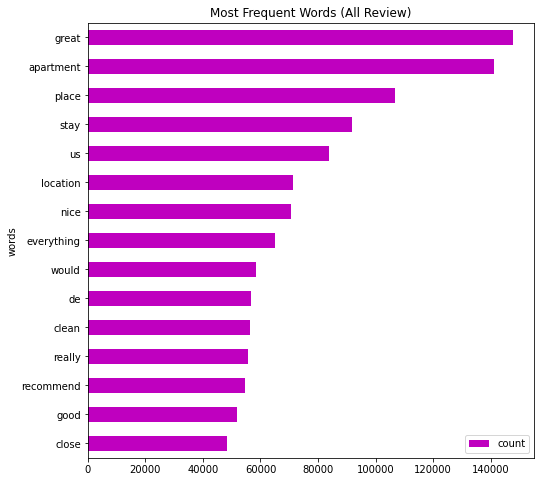

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="m")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

# Language detect

In [38]:
from langdetect import detect

In [39]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [40]:
%%time 
dataframe['language'] = dataframe['comments'].apply(language_detection)

Wall time: 1h 23min 26s


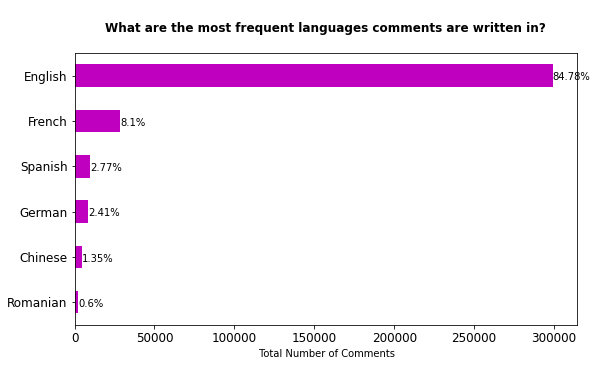

In [41]:
ax = dataframe.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="m", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'German', 'Chinese','Romanian'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
    
# invert for largest on top 
ax.invert_yaxis()

In [42]:
eng_data = dataframe[(dataframe['language']=='en')]

In [43]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [44]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

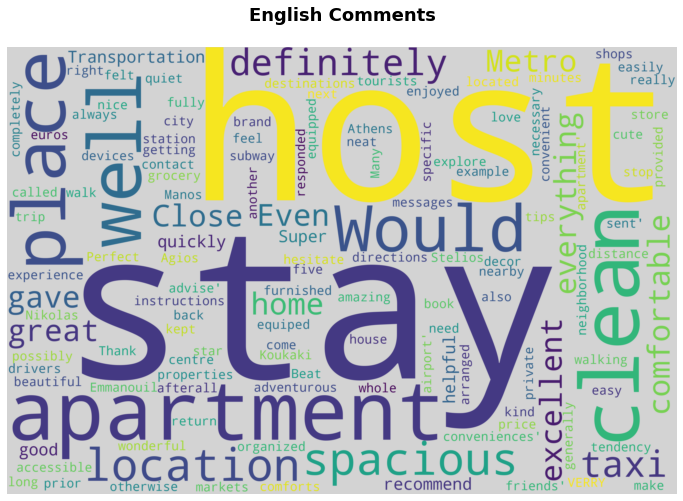

In [45]:
#WORD CLOUD FOR ENGLISH WORDS

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(eng_data.comments.values))

plot_wordcloud(wordcloud, 'English')

# Sentimental Analysis

In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [47]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = SentimentIntensityAnalyzer().polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [48]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [49]:
%%time


eng_data['sentiment_neg'] = eng_data['comments'].apply(negative_score)
eng_data['sentiment_neu'] = eng_data['comments'].apply(neutral_score)
eng_data['sentiment_pos'] = eng_data['comments'].apply(positive_score)
eng_data['sentiment_compound'] = eng_data['comments'].apply(compound_score)

Wall time: 6min 43s


In [50]:
#applying sentimenatl analysis on eng commenst beacsue majority

eng_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,10595,271535.0,20-05-2011,189305,Pamela,apartment wonderful fully equiped beautiful de...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.569,0.431,0.9448
1,10595,1994237.0,15-08-2012,289831,Andrey,Emmanouil excellent host provided with everyth...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,...,4.66,4.75,4.84,4.77,4.81,en,0.026,0.585,0.389,0.9819
2,10595,4678609.0,20-05-2013,2635427,Ahmet,Manos very good host kind helpful apartments s...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.367,0.633,0.9700
3,10595,12502994.0,04-05-2014,2422327,Hema,stay Emmanouil home comfortable quite just per...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.587,0.413,0.9833
4,10595,19482948.0,13-09-2014,6737784,Mariana,Fantastic accommodation very well located visi...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.76527,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.659,0.341,0.9818


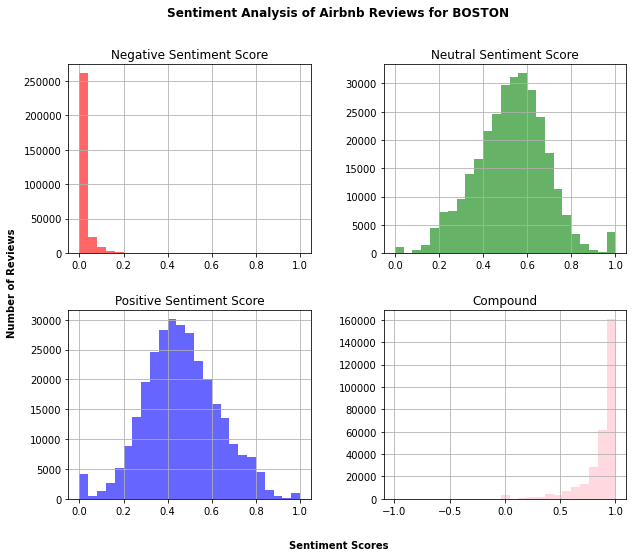

In [51]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
eng_data.hist('sentiment_neg', bins=25, ax=axes[0,0], color='r', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
eng_data.hist('sentiment_neu', bins=25, ax=axes[0,1], color='g', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
eng_data.hist('sentiment_pos', bins=25, ax=axes[1,0], color='b', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
eng_data.hist('sentiment_compound', bins=25, ax=axes[1,1], color='pink', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for BOSTON\n\n', fontsize=12, fontweight='bold');

In [52]:
eng_data.query('sentiment_pos> 0')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,10595,2.715350e+05,20-05-2011,189305,Pamela,apartment wonderful fully equiped beautiful de...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.765270,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.569,0.431,0.9448
1,10595,1.994237e+06,15-08-2012,289831,Andrey,Emmanouil excellent host provided with everyth...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.765270,...,4.66,4.75,4.84,4.77,4.81,en,0.026,0.585,0.389,0.9819
2,10595,4.678609e+06,20-05-2013,2635427,Ahmet,Manos very good host kind helpful apartments s...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.765270,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.367,0.633,0.9700
3,10595,1.250299e+07,04-05-2014,2422327,Hema,stay Emmanouil home comfortable quite just per...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.765270,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.587,0.413,0.9833
4,10595,1.948295e+07,13-09-2014,6737784,Mariana,Fantastic accommodation very well located visi...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.98863,23.765270,...,4.66,4.75,4.84,4.77,4.81,en,0.000,0.659,0.341,0.9818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406598,52663856,4.780180e+17,21-10-2021,7422446,Frederic,Great location great flat great host,ΣΤΑΔΙΟ,240612421,37.96567,23.735120,...,5.00,5.00,5.00,5.00,5.00,en,0.000,0.196,0.804,0.9231
406602,52744529,4.808590e+17,25-10-2021,428203290,Daniel,place brand tastefully furnished super host ve...,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,219394325,38.00154,23.733170,...,3.00,5.00,5.00,5.00,5.00,en,0.000,0.600,0.400,0.8927
406603,52744828,4.779460e+17,21-10-2021,38335433,Dwight,Great clean apartment devices were Many shops ...,ΚΥΨΕΛΗ,219394325,38.00130,23.735070,...,4.00,5.00,5.00,4.00,5.00,en,0.000,0.651,0.349,0.8934
406604,52752849,4.750790e+17,17-10-2021,426629667,Yana,Thank five star stay felt completely home real...,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,144814182,38.00293,23.727871,...,5.00,5.00,5.00,5.00,5.00,en,0.025,0.540,0.435,0.9869


In [53]:
eng_data.query('sentiment_neg > sentiment_pos')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
133,10993,6.604115e+08,05-09-2020,48865036,Themis,overall stay above average very negative aspec...,ΑΜΠΕΛΟΚΗΠΟΙ,37177,37.988880,23.76473,...,4.83,4.94,4.97,4.85,4.91,en,0.294,0.639,0.067,-0.8016
302,28186,1.173768e+07,14-04-2014,5012,Maile,Very central apartment walking distance everyt...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,121318,37.975450,23.72892,...,4.78,4.89,4.82,4.82,4.86,en,0.210,0.629,0.162,0.1589
398,28186,3.376645e+07,01-06-2015,25013149,Mimi,When told Francis arrival time answered with b...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,121318,37.975450,23.72892,...,4.78,4.89,4.82,4.82,4.86,en,0.129,0.784,0.087,-0.6068
594,28186,3.468636e+08,10-11-2018,36402774,Charita,location apartment excellent flat building whi...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,121318,37.975450,23.72892,...,4.78,4.89,4.82,4.82,4.86,en,0.198,0.677,0.125,-0.2862
603,28186,4.018588e+08,16-01-2019,7946282,Colin,Awesome space epic location with main shopping...,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,121318,37.975450,23.72892,...,4.78,4.89,4.82,4.82,4.86,en,0.195,0.688,0.117,-0.4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406262,51739938,4.627720e+17,30-09-2021,228349368,Nivine,Looks nice fully functional unfortunately wash...,ΝΕΟΣ ΚΟΣΜΟΣ,123074489,37.964306,23.72827,...,4.45,4.64,5.00,4.45,4.64,en,0.153,0.726,0.121,-0.3790
406291,51780189,4.366490e+17,25-08-2021,50455274,Ioannis,There internet during first router brand Wind ...,ΘΗΣΕΙΟ,237767294,37.974160,23.71725,...,2.50,4.50,4.00,3.00,4.00,en,0.134,0.782,0.084,-0.7089
406505,52297302,4.613370e+17,28-09-2021,286355456,Pavlína,place what expected apartment basement which w...,ΚΟΛΩΝΑΚΙ,339973983,37.976410,23.74664,...,4.00,3.71,4.29,3.57,3.71,en,0.077,0.885,0.038,-0.4404
406536,52434125,4.678770e+17,07-10-2021,375419138,Emilia Maria,Awful irons from mattress where painful mattre...,ΑΜΠΕΛΟΚΗΠΟΙ,424403501,37.990780,23.76643,...,3.33,4.00,5.00,3.67,3.00,en,0.149,0.774,0.077,-0.8347


In [54]:
percentiles = eng_data.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    299249.000000
mean          0.857841
std           0.197160
min          -0.994600
5%            0.475400
10%           0.624900
20%           0.796400
30%           0.864300
40%           0.902200
50%           0.927900
60%           0.945900
70%           0.960000
80%           0.971500
90%           0.982000
max           0.999500
Name: sentiment_compound, dtype: float64

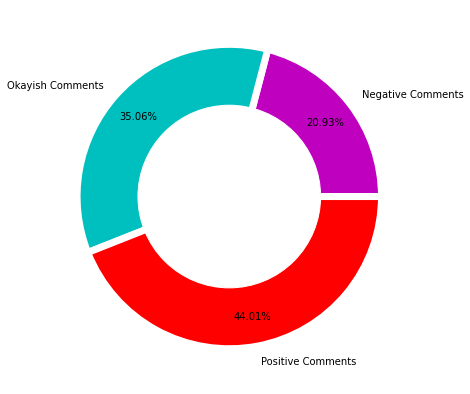

In [56]:
# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['m', 'c', 'r'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [57]:
# full dataframe with POSITIVE comments
df_pos = eng_data.loc[eng_data.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [58]:
# full dataframe with NEGATIVE comments
df_neg = eng_data.loc[eng_data.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

# Comparing positive and negative

In [59]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

In [60]:
pos_comments[10:15]

['listing this space accurately describes experience time here apartment looked exactly shown pictures complete with oranges arrived night first area looked little sketchy once chance walk around felt perfectly comfortable coming going when pleased apartment pretty clean within walking distance metro which VERY convenient extra bonus calls were provided extra charge Upon booking space Manos emailed with lots information what expect Once arrived with give keys showed outs apartment also gave information about visiting different sites Athens well areas thought best avoid were young women traveling alone Overall great stay would highly recommend this space',
 'stayed Manos apartments both excellent well placed safe areas clean comfortable Manos superb host very helpful always ready need have Highly recommended',
 'This second stay family with Emmanouil again proved excellent host apartment very comfortable everything appeared modern spent some time exploring local area found some interest

In [61]:
# read some negative comments
neg_comments[10:15]

['what were expecting apartment really well located center Athens when arrived take sheets towels that were drying able start washing machine expect beds king size convertible couch which enough mugs four people coffee small things when everything disappointed windows living room which means that when cook smells stays even with hood Anyway Theodore Reshma were really reactive with messages thank left disappointed with experience',
 'difficulty getting keys place when arrive Indian restaurant have keys kindly called numbers Theodore left with place spacious dusty water pressure shower very weak making difficult shower Location fantastic arrive from airport only took mins walk place',
 'Cockroach problem stemming from kitchen into rest apartment Spiders flies normally bother roaches only come there something unclean attracting them Powerful moldy smell coming from under kitchen sink point that stopped opening cupboard from bathroom well guess that cleaning high Bathroom window broken pe

# Word cloud positive comments/


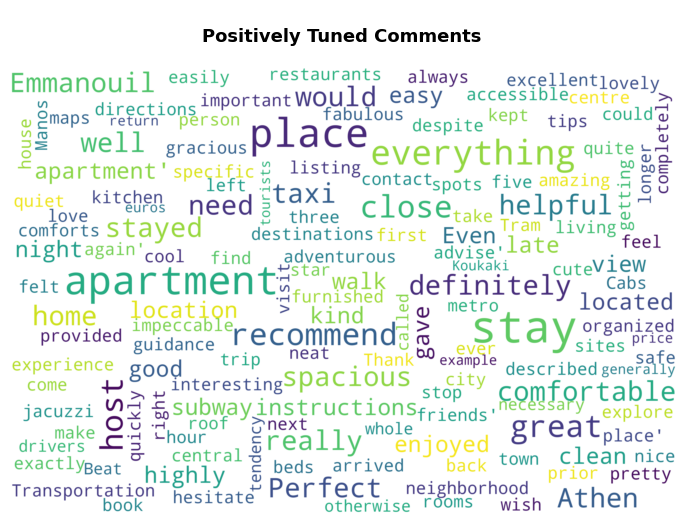

In [62]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="white",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [63]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

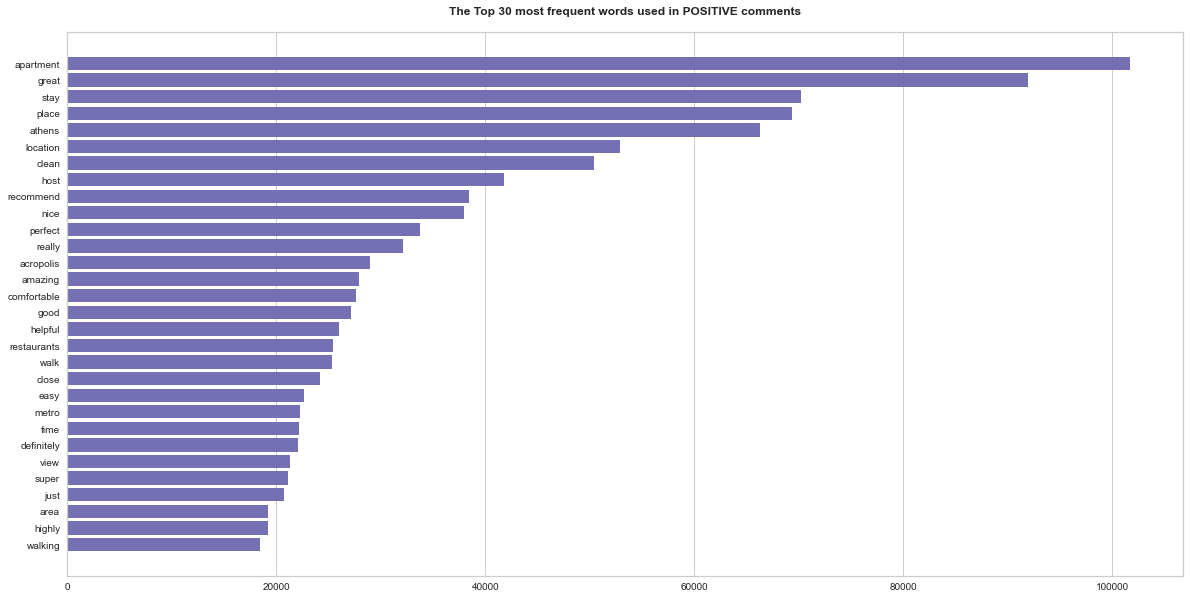

In [64]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# Word cloud negative comments

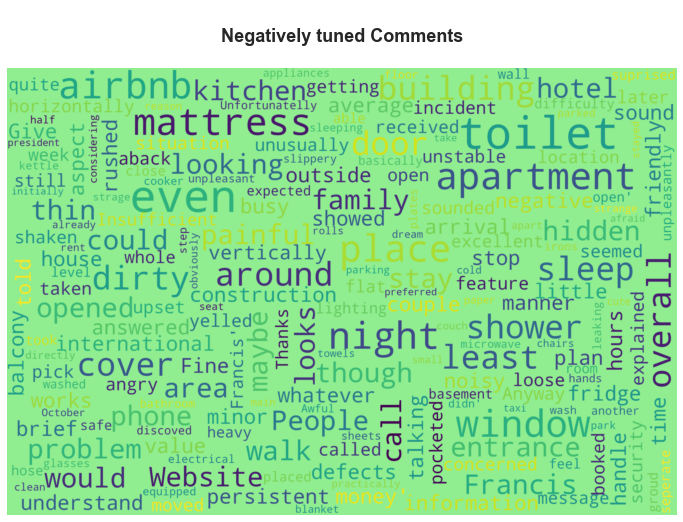

In [65]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgreen",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively tuned')

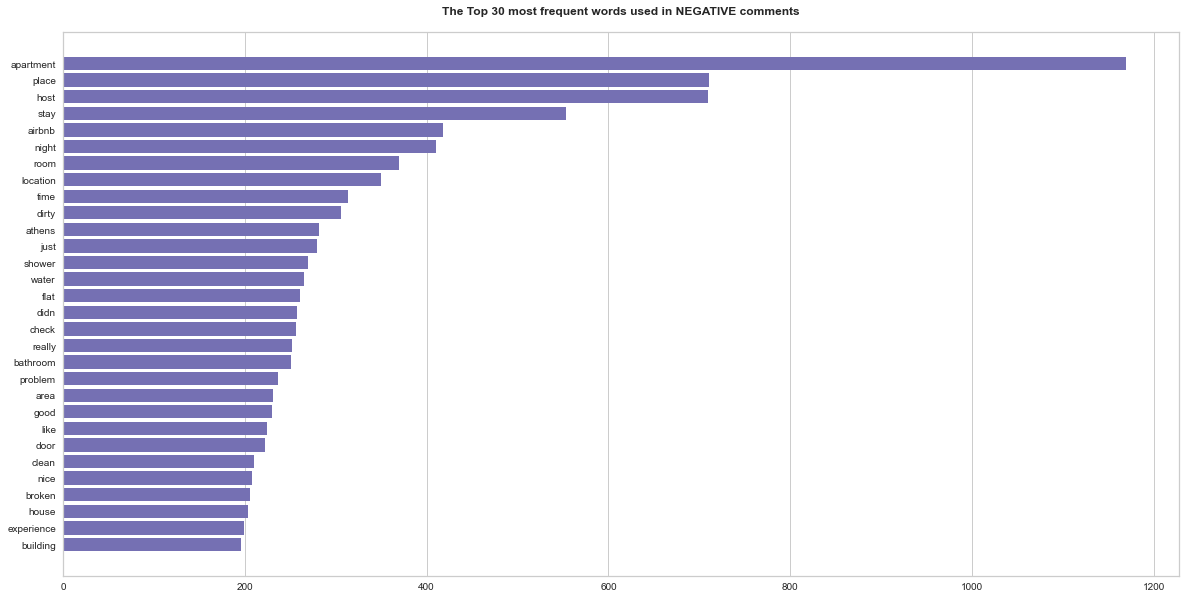

In [66]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# To find the Top Hosts based on User Reviews and Top Hosts' neighbourhood

In [67]:
dataframe['comments'][0]

'apartment wonderful fully equiped beautiful decor very comfortable VERRY CLEAN Would stay there again possibly another host properties Close Metro markets grocery store conveniences'

In [68]:
# function to calculate the sentiments of the user reviews

def nltk_sentiment(input_text):
    score_dict = analyzer.polarity_scores(input_text)
    return score_dict['compound']

In [69]:
# applying the function to the whole column

dataframe['Sentiment_NLTK'] = dataframe['comments'].apply(lambda x: nltk_sentiment(str(x)))

In [70]:
# creating a new dataframe where I'm grouping the listing_id column i.e. according to the listings
# and further calculating the average of the sentiment score

reviews_avg = dataframe .groupby(['listing_id']).mean()['Sentiment_NLTK']

reviews_avg.head

<bound method NDFrame.head of listing_id
10595       0.508937
10990       0.500002
10993       0.569431
10995       0.722842
27262       0.600394
              ...   
52744529    0.892700
52744828    0.893400
52752849    0.986900
52809823    0.000000
52810712    0.934900
Name: Sentiment_NLTK, Length: 7840, dtype: float64>

# Top 5 hosts

In [71]:
reviews_avg.nlargest()

listing_id
251361      0.9956
14478684    0.9955
50093617    0.9944
23913623    0.9935
33729474    0.9926
Name: Sentiment_NLTK, dtype: float64

In [72]:
# listings dataset contains Detailed Listings data for Amsterdam

listings = pd.read_csv("listings_athens.csv")

# calendar dataset contains Detailed Calendar Data for listings in Amsterdam



# reviews dataset contains Detailed Review Data for listings in Amsterdam

reviews = pd.read_csv("reviews_athens.csv")

In [73]:
# creating a top_hosts dataframe

top_hosts = pd.DataFrame()
listing_ids = list(reviews_avg.nlargest().index)
for idx in listing_ids:
    top_hosts = top_hosts.append(listings[listings.id==idx])
top_hosts.reset_index(inplace=True)
del top_hosts['index']

top_hosts.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,251361,https://www.airbnb.com/rooms/251361,2.021100e+13,26-10-2021,A relaxing house overlooking Athens,<b>The space</b><br />IF you are planning to s...,NaN,https://a0.muscache.com/pictures/2485905/b6161...,592616,https://www.airbnb.com/users/show/592616,...,5.0,5.0,4.0,NaN,f,1,1,0,0,0.01
1,14478684,https://www.airbnb.com/rooms/14478684,2.021100e+13,25-10-2021,"Stylish apartment, Acropolis view",Stylish and very comfortable apartment situate...,Pangrati is a historical city centre neighbour...,https://a0.muscache.com/pictures/50ac9ad3-596c...,76880641,https://www.airbnb.com/users/show/76880641,...,5.0,5.0,5.0,NaN,f,1,1,0,0,0.02
2,50093617,https://www.airbnb.com/rooms/50093617,2.021100e+13,26-10-2021,Piano Deluxe Apt near Acropolis,Luxury Spacious Apartment 80sq m in the heart ...,NaN,https://a0.muscache.com/pictures/0608a913-7c7c...,152097668,https://www.airbnb.com/users/show/152097668,...,5.0,5.0,5.0,NaN,t,1,1,0,0,0.56
3,23913623,https://www.airbnb.com/rooms/23913623,2.021100e+13,26-10-2021,Modern Apartment Art Deco Building in Koukaki,The apartment is located in an original 1930's...,The apartment is situated in the Koukaki area....,https://a0.muscache.com/pictures/48ae6582-be7c...,178447744,https://www.airbnb.com/users/show/178447744,...,5.0,5.0,5.0,210652,f,3,3,0,0,0.02
4,33729474,https://www.airbnb.com/rooms/33729474,2.021100e+13,25-10-2021,"Modern 2bedroom apartment in Kolonaki, Lycabettus","A recent renovated, modern and cozy 90m² apart...",Living under the mountain of Lycabettus gives ...,https://a0.muscache.com/pictures/f967d626-6794...,244270550,https://www.airbnb.com/users/show/244270550,...,5.0,5.0,5.0,960694,f,1,1,0,0,0.07


In [74]:
# finding the names of top hosts' property

top_hosts.host_name

0    Andreas
1     Argyro
2      Liana
3      Mania
4     Rosina
Name: host_name, dtype: object

In [79]:
top_hosts.neighbourhood_cleansed

0            ΑΝΩ ΠΑΤΗΣΙΑ
1               ΠΑΓΚΡΑΤΙ
2              ΠΕΤΡΑΛΩΝΑ
3    ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
4             ΛΥΚΑΒΗΤΤΟΣ
Name: neighbourhood_cleansed, dtype: object

In [76]:
# REVIEW/COMMENT OF TOP 1ST HOST WITH LISTING ID==251361

list(reviews[reviews.listing_id==251361].comments)

['What a lovely apartment!  My husband, baby, toddler and I stayed there for 2 weeks and found it a perfect home away from home. The place was beautiful: great location (right in front is a church with large trees surrounding it, with a view of the entire city in front as it\'s on a slight hill, with a gorgeous balcony with a sofa and patio furniture to enjoy it on), beautiful furnishings, well-equipped kitchen, and generally everything you could think of for a comfortable stay.  Although it\'s a 1 bedroom apartment, it\'s a huge bedroom (really 2, with a sliding glass door between if you like), and a comfy couch in the living room, so fit us all.  The location is out of the downtown core of Athens, in a residential neighbourhood (so not touristy), with real neighbourhood shops, taverns, cafes, plazas, etc.  It\'s perfect in that it\'s only a 20 min direct bus downtown, but all the benefits of being in a "real" neighbourhood, with parks (great for families), and very quite (as quiet as

In [77]:
# REVIEW OF TOP 2ND HOST Argyro

list(reviews[reviews.listing_id==14478684].comments)

['If I had to rate my satisfaction with Argyro´s apartment, out of 10, it would be 10. Argyro is an outstanding host. My husband and I arrived at Athens early than expected and not only was Argyro waiting to greeting us at the apartment but she stocked the fridge with plenty of goodies: fruit, jam, butter, wine, beer…to celebrate our arrival. We felt at home right away and found very easy to settle in. The apartment itself is beautiful, very good taste, comfortable, with lots of natural light and plenty of space for the two of us. The air conditioning worked very well as well as the stereo hi-fi. The apartment is very well located, in a quiet however vibrant neighbourhood with restaurants, taverns and shops in and around. It is also very well stocked with anything and everything you may need, from Nespresso coffee capsules, to Greek sweets to fine soap.  I can´t say enough good about this apartment. A fabulous place to stay and wonderful host. Thanks Argyro. ']